In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [4]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv", index_col="Serial No.")

In [5]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96
498,330,120,5,4.5,5.0,9.56,1,0.93


In [6]:
y = data['Chance of Admit ']
X = data.drop('Chance of Admit ', axis=1)

In [7]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1
497,337,117,5,5.0,5.0,9.87,1
498,330,120,5,4.5,5.0,9.56,1


In [8]:
y

Serial No.
1      0.92
2      0.76
3      0.72
4      0.80
5      0.65
       ... 
496    0.87
497    0.96
498    0.93
499    0.73
500    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [9]:
pca = PCA(n_components=2)
pca.fit(X)
X_PCA = pca.transform(X)

In [10]:
X_PCA = pd.DataFrame(X_PCA, columns=['PC1', 'PC2'])

In [11]:
X_PCA

,PC1,PC2
0,-23.273887,-0.783279
1,-6.811715,3.351076
2,1.841991,2.687708
3,-6.140811,-0.024660
4,4.212021,2.824404
...,...,...
495,-14.484897,5.912684
496,-22.957009,-0.008506
497,-17.942750,-5.731901
498,5.690921,1.610405


Text(0, 0.5, 'PC2')

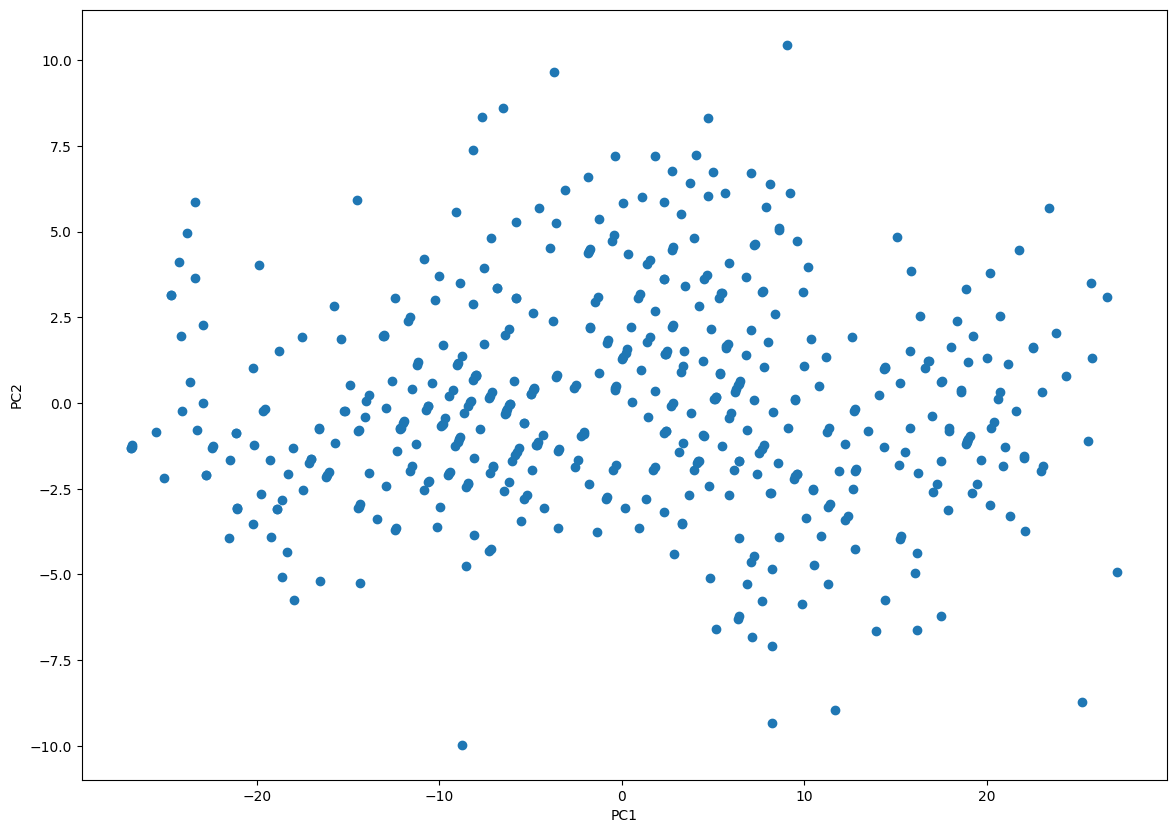

In [12]:
plt.figure(figsize=(14, 10))
plt.scatter(X_PCA['PC1'], X_PCA['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')

In [13]:
PCA_max = np.argmax(X_PCA['PC1'])
PCA_min = np.argmin(X_PCA['PC1'])

print(PCA_max)
print(PCA_min)

377
202


In [14]:
X.iloc[PCA_max, :]

GRE Score            290.00
TOEFL Score          100.00
University Rating      1.00
SOP                    1.50
LOR                    2.00
CGPA                   7.56
Research               0.00
Name: 378, dtype: float64

In [15]:
X.iloc[PCA_min, :]

GRE Score            340.00
TOEFL Score          120.00
University Rating      5.00
SOP                    4.50
LOR                    4.50
CGPA                   9.91
Research               1.00
Name: 203, dtype: float64

In [16]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [17]:
pd.DataFrame(X)

,0,1,2,3,4,5,6
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0
...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
model.score(X_test, y_test)

0.7866565968155326

In [21]:
pred = model.predict(X_test)

Text(0, 0.5, 'Actual value')

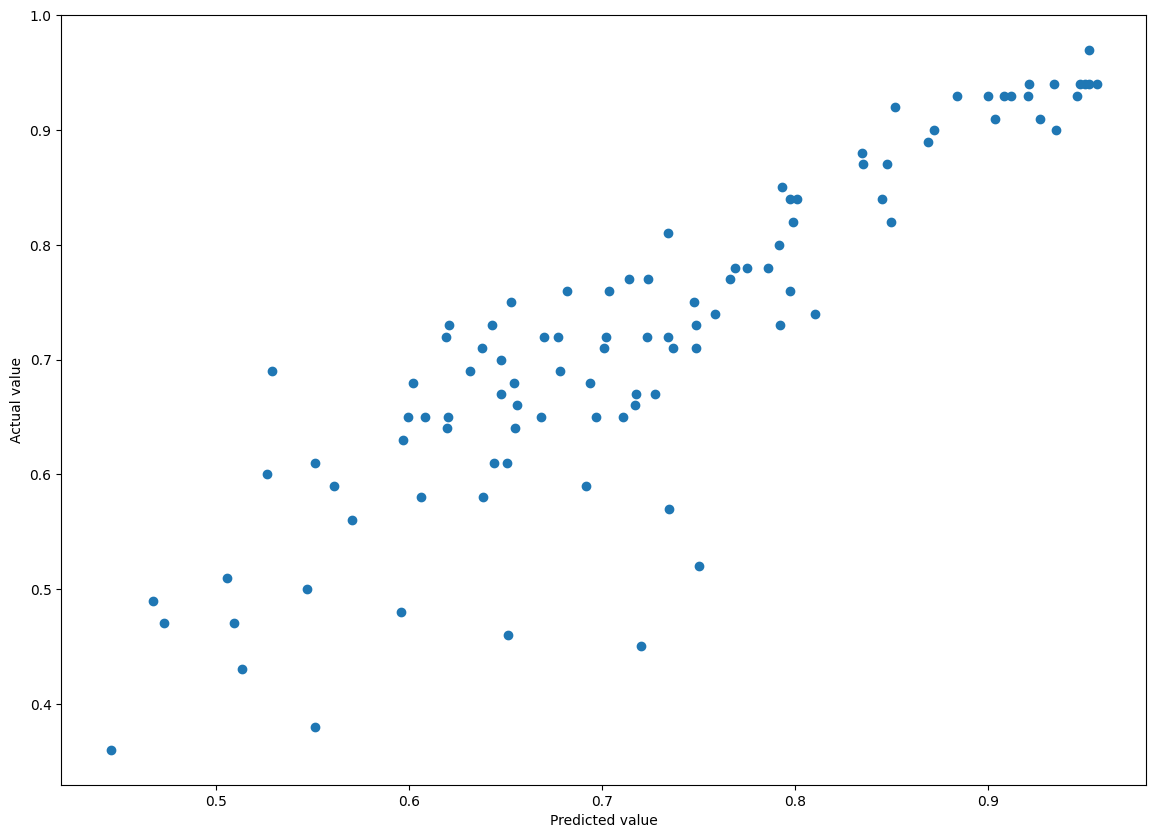

In [22]:
plt.figure(figsize=(14, 10))
plt.plot(pred, y_test, 'o')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')